In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier  import EnsembleVoteClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [70]:
#reading the data from the local system
df=pd.read_excel(r"/Users/arjunsahas/Downloads/spam.xlsx")
df

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,ham
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,spam
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.000,1,3,ham
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,ham


In [71]:
df.shape

(4601, 58)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   3d          4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

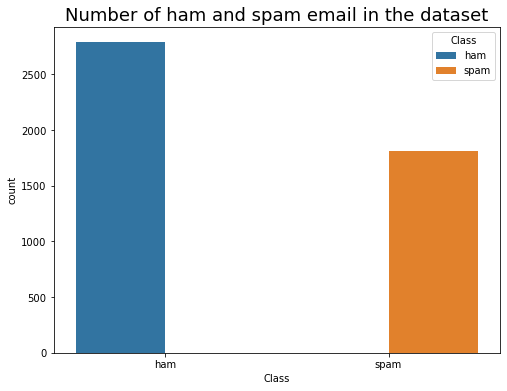

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(df["Class"],hue=df["Class"])
plt.title("Number of ham and spam email in the dataset",fontsize=18)
plt.show()

In [74]:
#making the target column to ham as 0 and spam as 1.
df['Class']=df["Class"].replace({"ham":0,"spam":1})

In [75]:
#making dependent and Independent features
X=df.drop(columns=['Class'],axis=1)
y=df["Class"]

In [76]:
#Splitting the dataset into trainingset and testingset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

### Fused models

In [77]:
clf1=DecisionTreeClassifier()
clf2=GaussianNB()
clf3=LogisticRegression()

In [78]:
model=EnsembleVoteClassifier(clfs=[clf1,clf2,clf3],voting="hard")
model.fit(X_train,y_train)
pred_1=model.predict(X_test)
print("Accuracy of Fused model",accuracy_score(y_test,pred_1))

Accuracy of Fused model 0.9341057204923968


### Adaboost Model

In [84]:
#adaboost model by default it use Decisiontree as base learner.
ada_model=AdaBoostClassifier()
#training the model
ada_model.fit(X_test,y_test)
#prediction
pred_4=ada_model.predict(X_test)
acc_score_ada=accuracy_score(y_test,pred_4)
print("AdaBoost model accuracy %.2f" % acc_score_ada)

AdaBoost model accuracy 0.97


### RandomForest Model

In [83]:
rf_model=RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train,y_train)
pred_5=rf_model.predict(X_test)
acc_score_rf=accuracy_score(y_test,pred_5)
print("RandomForest model accuracy %.2f" % acc_score_rf)

RandomForest model accuracy 0.95


### 50% - 50% split

In [85]:
#splitting the data into training and testing 50-50
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X,y,test_size=0.5,random_state=1234)

In [89]:
fused_1=EnsembleVoteClassifier(clfs=[clf1,clf2,clf3],voting="hard")
fused_1.fit(X_train_1,y_train_1)
fused_pred_1=fused_1.predict(X_test_1)
print("Accuracy of Fused model model with 50-50 split",accuracy_score(y_test_1,fused_pred_1))

ada_1=AdaBoostClassifier()
ada_1.fit(X_train_1,y_train_1)
fused_pred_ada=ada_1.predict(X_test_1)
print("accuracy score of AdaBoost model with 50-50 split : {:.2f}".format(accuracy_score(y_test_1,fused_pred_ada)))


Accuracy of Fused model model with 50-50 split 0.9322033898305084
accuracy score of AdaBoost model with 50-50 split : 0.94


### 60% - 40% Split

In [90]:
#splitting the data into training and testing 60-40
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X,y,test_size=0.4,random_state=1234)

In [91]:
fused_2=EnsembleVoteClassifier(clfs=[clf1,clf2,clf3],voting="hard")
fused_2.fit(X_train_2,y_train_2)
fused_pred_2=fused_2.predict(X_test_2)
print("Accuracy of Fused model with 60-40 split",accuracy_score(y_test_2,fused_pred_2))

ada_2=AdaBoostClassifier()
ada_2.fit(X_train_2,y_train_2)
fused_pred_ada_2=ada_2.predict(X_test_2)
print("accuracy score of AdaBoost model with 60-40 split : {:.2f}".format(accuracy_score(y_test_2,fused_pred_ada_2)))


Accuracy of Fused model with 60-40 split 0.9369907658881043
accuracy score of AdaBoost model with 60-40 split : 0.94


### 70% - 30% Split

In [92]:
#splitting the data into training and testing 70-30
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(X,y,test_size=0.3,random_state=1234)

In [93]:
fused_3=EnsembleVoteClassifier(clfs=[clf1,clf2,clf3],voting="hard")
fused_3.fit(X_train_3,y_train_3)
fused_pred_3=fused_3.predict(X_test_3)
print("Accuracy of Fused model with 70-30 split",accuracy_score(y_test_3,fused_pred_3))

ada_3=AdaBoostClassifier()
ada_3.fit(X_train_3,y_train_3)
fused_pred_ada_3=ada_3.predict(X_test_3)
print("accuracy score of AdaBoost model with 70-30 split : {:.2f}".format(accuracy_score(y_test_3,fused_pred_ada_3)))


Accuracy of Fused model with 70-30 split 0.9355539464156408
accuracy score of AdaBoost model with 70-30 split : 0.94


### 80% - 20% Split

In [57]:
#splitting the data into training and testing 80-20
X_train_4,X_test_4,y_train_4,y_test_4=train_test_split(X,y,test_size=0.2,random_state=1234)

In [94]:
fused_4=EnsembleVoteClassifier(clfs=[clf1,clf2,clf3],voting="hard")
fused_4.fit(X_train_4,y_train_4)
fused_pred_4=fused_4.predict(X_test_4)
print("Accuracy of Fused model with 80-20 split",accuracy_score(y_test_4,fused_pred_4))

ada_4=AdaBoostClassifier()
ada_4.fit(X_train_4,y_train_4)
fused_pred_ada_4=ada_4.predict(X_test_4)
print("accuracy score of AdaBoost model with 80-20 split : {:.2f}".format(accuracy_score(y_test_4,fused_pred_ada_4)))


Accuracy of Fused model with 80-20 split 0.9402823018458197
accuracy score of AdaBoost model with 80-20 split : 0.94


### Accuracies of all models

In [106]:
models=[DecisionTreeClassifier(),GaussianNB(),LogisticRegression(),AdaBoostClassifier(),RandomForestClassifier()]
for i in models:
    model=i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("{} accuracy is {:.3f}" .format(i,acc_score))
    con_matrix=confusion_matrix(y_test,y_pred)
    print("confusion matrix of {} \n {}".format(i,con_matrix))
    cls_report=classification_report(y_test,y_pred)
    print("classification report of {} \n {}".format(i,cls_report))
    #perclass accuracy rate
    tp=con_matrix[0][0]
    fp=con_matrix[0][1]
    fn=con_matrix[1][0]
    tn=con_matrix[1][1]
    #per-class classification accuracy
    spam=tn/(fn+tn)
    print("per-class classification accuracy of spam: {:.2f}".format(spam))
    ham=tp/(tp+fp)
    print("per-class classification accuracy of ham: {:.2f}".format(ham))
    print("======================================================================================================")

DecisionTreeClassifier() accuracy is 0.915
confusion matrix of DecisionTreeClassifier() 
 [[801  73]
 [ 45 462]]
classification report of DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       874
           1       0.86      0.91      0.89       507

    accuracy                           0.91      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.92      0.91      0.92      1381

per-class classification accuracy of spam: 0.91
per-class classification accuracy of ham: 0.92
GaussianNB() accuracy is 0.810
confusion matrix of GaussianNB() 
 [[634 240]
 [ 22 485]]
classification report of GaussianNB() 
               precision    recall  f1-score   support

           0       0.97      0.73      0.83       874
           1       0.67      0.96      0.79       507

    accuracy                           0.81      1381
   macro avg       0.82      0.84      0.81      1381
weighted avg